In [0]:
!wget https://raw.githubusercontent.com/harunshimanto/AI_Lab/master/AI%20Lab/moviestoryline.csv

--2019-10-09 12:56:17--  https://raw.githubusercontent.com/harunshimanto/AI_Lab/master/AI%20Lab/moviestoryline.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2912152 (2.8M) [text/plain]
Saving to: ‘moviestoryline.csv’

moviestoryline.csv  100%[===================>]   2.78M  --.-KB/s    in 0.05s   

2019-10-09 12:56:17 (51.1 MB/s) - ‘moviestoryline.csv’ saved [2912152/2912152]



In [1]:
import os

# Plotting Libs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# magic function
%matplotlib inline

import collections
import numpy as np # linear algebra
import pandas as pd

import seaborn as sns
import nltk

In [2]:
df = pd.read_csv('moviestoryline.csv')

In [0]:
#df['cleaned_genres'] = df['genres'].str.replace(r'[\[\]\'\,|]',' ')

In [3]:
df.drop('Unnamed: 0',1,inplace=True)

In [4]:
df.head()

,genres,storyline
0,Action|Adventure|Fantasy|Sci-Fi,"When his brother is killed in a robbery, parap..."
1,Action|Adventure|Fantasy,"After Elizabeth, Will, and Captain Barbossa re..."
2,Action|Adventure|Thriller,A cryptic message from the past sends James Bo...
3,Action|Thriller,Despite his tarnished reputation after the eve...
4,Documentary,NaN


In [5]:
df.storyline.value_counts()

12-year-old orphan Peter is spirited away to the magical world of Neverland, where he finds both fun and danger, and ultimately discovers his destiny -- to become the hero who will be forever known as Peter Pan.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [6]:
df.storyline=df.storyline.drop_duplicates(keep='first')
df.storyline.value_counts()

The four and 1/4 hour depiction of the historical and personal events surrounding and including the decisive American civil war battle features thousands of civil war re-enactors marching over the exact ground that the federal army and the army of North Virginia fought on. The defense of the Little Round Top and Pickett's Charge are highlighted in the actual three day battle which is surrounded by the speeches of the commanding officers and the personal reflections of the fighting men. Based upon the novel 'The Killer Angels'.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [7]:
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
def clean(s):
    s=str(s)
    s=s.lower()
    html=re.compile('<.*?>')   #removing html tags
    cleaned = re.sub(html,' ',s)
    fil=[]
    for i in cleaned.split():
        if i!='c++':
            cleaned=re.sub('[^A-Za-z]+', '', i)
            fil.append(cleaned)
        else:
            fil.append(i)
    return fil
stop=set(stopwords.words('english'))
sno=SnowballStemmer('english')
clean(df.storyline[0])

[nltk_data] Downloading package stopwords to C:\Users\admin-
[nltk_data]     karim\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['when',
 'his',
 'brother',
 'is',
 'killed',
 'in',
 'a',
 'robbery',
 'paraplegic',
 'marine',
 'jake',
 'sully',
 'decides',
 'to',
 'take',
 'his',
 'place',
 'in',
 'a',
 'mission',
 'on',
 'the',
 'distant',
 'world',
 'of',
 'pandora',
 'there',
 'he',
 'learns',
 'of',
 'greedy',
 'corporate',
 'figurehead',
 'parker',
 'selfridges',
 'intentions',
 'of',
 'driving',
 'off',
 'the',
 'native',
 'humanoid',
 'navi',
 'in',
 'order',
 'to',
 'mine',
 'for',
 'the',
 'precious',
 'material',
 'scattered',
 'throughout',
 'their',
 'rich',
 'woodland',
 'in',
 'exchange',
 'for',
 'the',
 'spinal',
 'surgery',
 'that',
 'will',
 'fix',
 'his',
 'legs',
 'jake',
 'gathers',
 'intel',
 'for',
 'the',
 'cooperating',
 'military',
 'unit',
 'spearheaded',
 'by',
 'gungho',
 'colonel',
 'quaritch',
 'while',
 'simultaneously',
 'attempting',
 'to',
 'infiltrate',
 'the',
 'navi',
 'people',
 'with',
 'the',
 'use',
 'of',
 'an',
 'avatar',
 'identity',
 'while',
 'jake',
 'begins',
 't

In [8]:
def stem(s):
    fil=[]
    for _ in s:
        if _ not in stop:
            s=(sno.stem(_).encode('utf8'))
            fil.append(s)
    s=b' '.join(fil)
    return s
#stem("b'how to draw a stacked dotplot in r'")

In [9]:
l=[]
for _ in df.storyline:
    l.append(stem(clean(_)))

In [10]:
df['clean']=l
#df.to_csv('train_clean',index=False)

In [11]:
import re
l=[]
for i in df.genres:
    l.append(re.sub('[^A-Za-z#+-]+', ' ', i))

In [12]:
df['cgenres']=l
df.head()

,genres,storyline,clean,cgenres
0,Action|Adventure|Fantasy|Sci-Fi,"When his brother is killed in a robbery, parap...",b'brother kill robberi parapleg marin jake sul...,Action Adventure Fantasy Sci-Fi
1,Action|Adventure|Fantasy,"After Elizabeth, Will, and Captain Barbossa re...",b'elizabeth captain barbossa rescu captain jac...,Action Adventure Fantasy
2,Action|Adventure|Thriller,A cryptic message from the past sends James Bo...,b'cryptic messag past send jame bond rogu miss...,Action Adventure Thriller
3,Action|Thriller,Despite his tarnished reputation after the eve...,b'despit tarnish reput event dark knight took ...,Action Thriller
4,Documentary,NaN,b'nan',Documentary


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
genre_dtm = vectorizer.fit_transform(df['cgenres'])

In [14]:
print("Number of data points :", genre_dtm.shape[0])
print("Number of unique tags :", genre_dtm.shape[1])
genres = vectorizer.get_feature_names()
#Lets look at the tags we have.
print("Some of the genres we have :", genres[:10])

Number of data points : 5043
Number of unique tags : 26
Some of the genres we have : ['action', 'adventure', 'animation', 'biography', 'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy']


In [15]:
freqs = genre_dtm.sum(axis=0).A1
result = dict(zip(genres, freqs))

In [16]:
l=list(freqs)
df_genrecount=pd.DataFrame()
df_genrecount['genres']=genres
df_genrecount['count']=l
df_genrecount.to_csv('genrecount',index=False)
df_genrecount=pd.read_csv('genrecount')
df_genrecount.head()

,genres,count
0,action,1153
1,adventure,923
2,animation,242
3,biography,293
4,comedy,1872


In [17]:
df_genre_sort=df_genrecount.sort_values(['count'],ascending=False)
df_count=df_genre_sort['count'].values
df_count

array([2594, 1872, 1411, 1153, 1107,  923,  889,  616,  610,  565,  546,
        500,  293,  242,  214,  213,  207,  182,  132,  121,   97,    6,
          5,    3,    2,    1], dtype=int64)

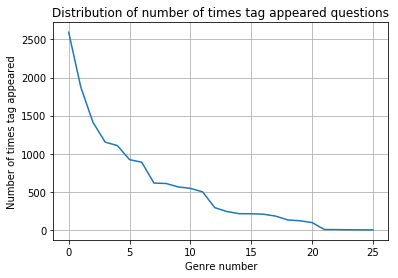

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(df_count)
plt.title("Distribution of number of times tag appeared questions")
plt.grid()
plt.xlabel("Genre number")
plt.ylabel("Number of times tag appeared")
plt.show()

In [19]:
genre_quest_count = genre_dtm.sum(axis=1).tolist()
genre_quest_count=[int(j) for i in genre_quest_count for j in i]
print ('We have total {} datapoints.'.format(len(genre_quest_count)))

print(genre_quest_count[:5])

We have total 5043 datapoints.
[4, 3, 3, 2, 1]


In [20]:
print( "Maximum number of genres per question: %d"%max(genre_quest_count))
print( "Minimum number of genres per question: %d"%min(genre_quest_count))
print( "Avg. number of genres per question: %f"% ((sum(genre_quest_count)*1.0)/len(genre_quest_count)))

Maximum number of genres per question: 8
Minimum number of genres per question: 1
Avg. number of genres per question: 2.876066


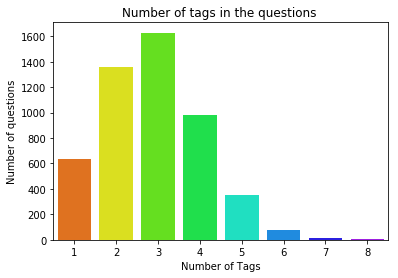

In [21]:
import seaborn as sns
sns.countplot(genre_quest_count, palette='gist_rainbow')
plt.title("Number of tags in the questions ")
plt.xlabel("Number of Tags")
plt.ylabel("Number of questions")
plt.show()

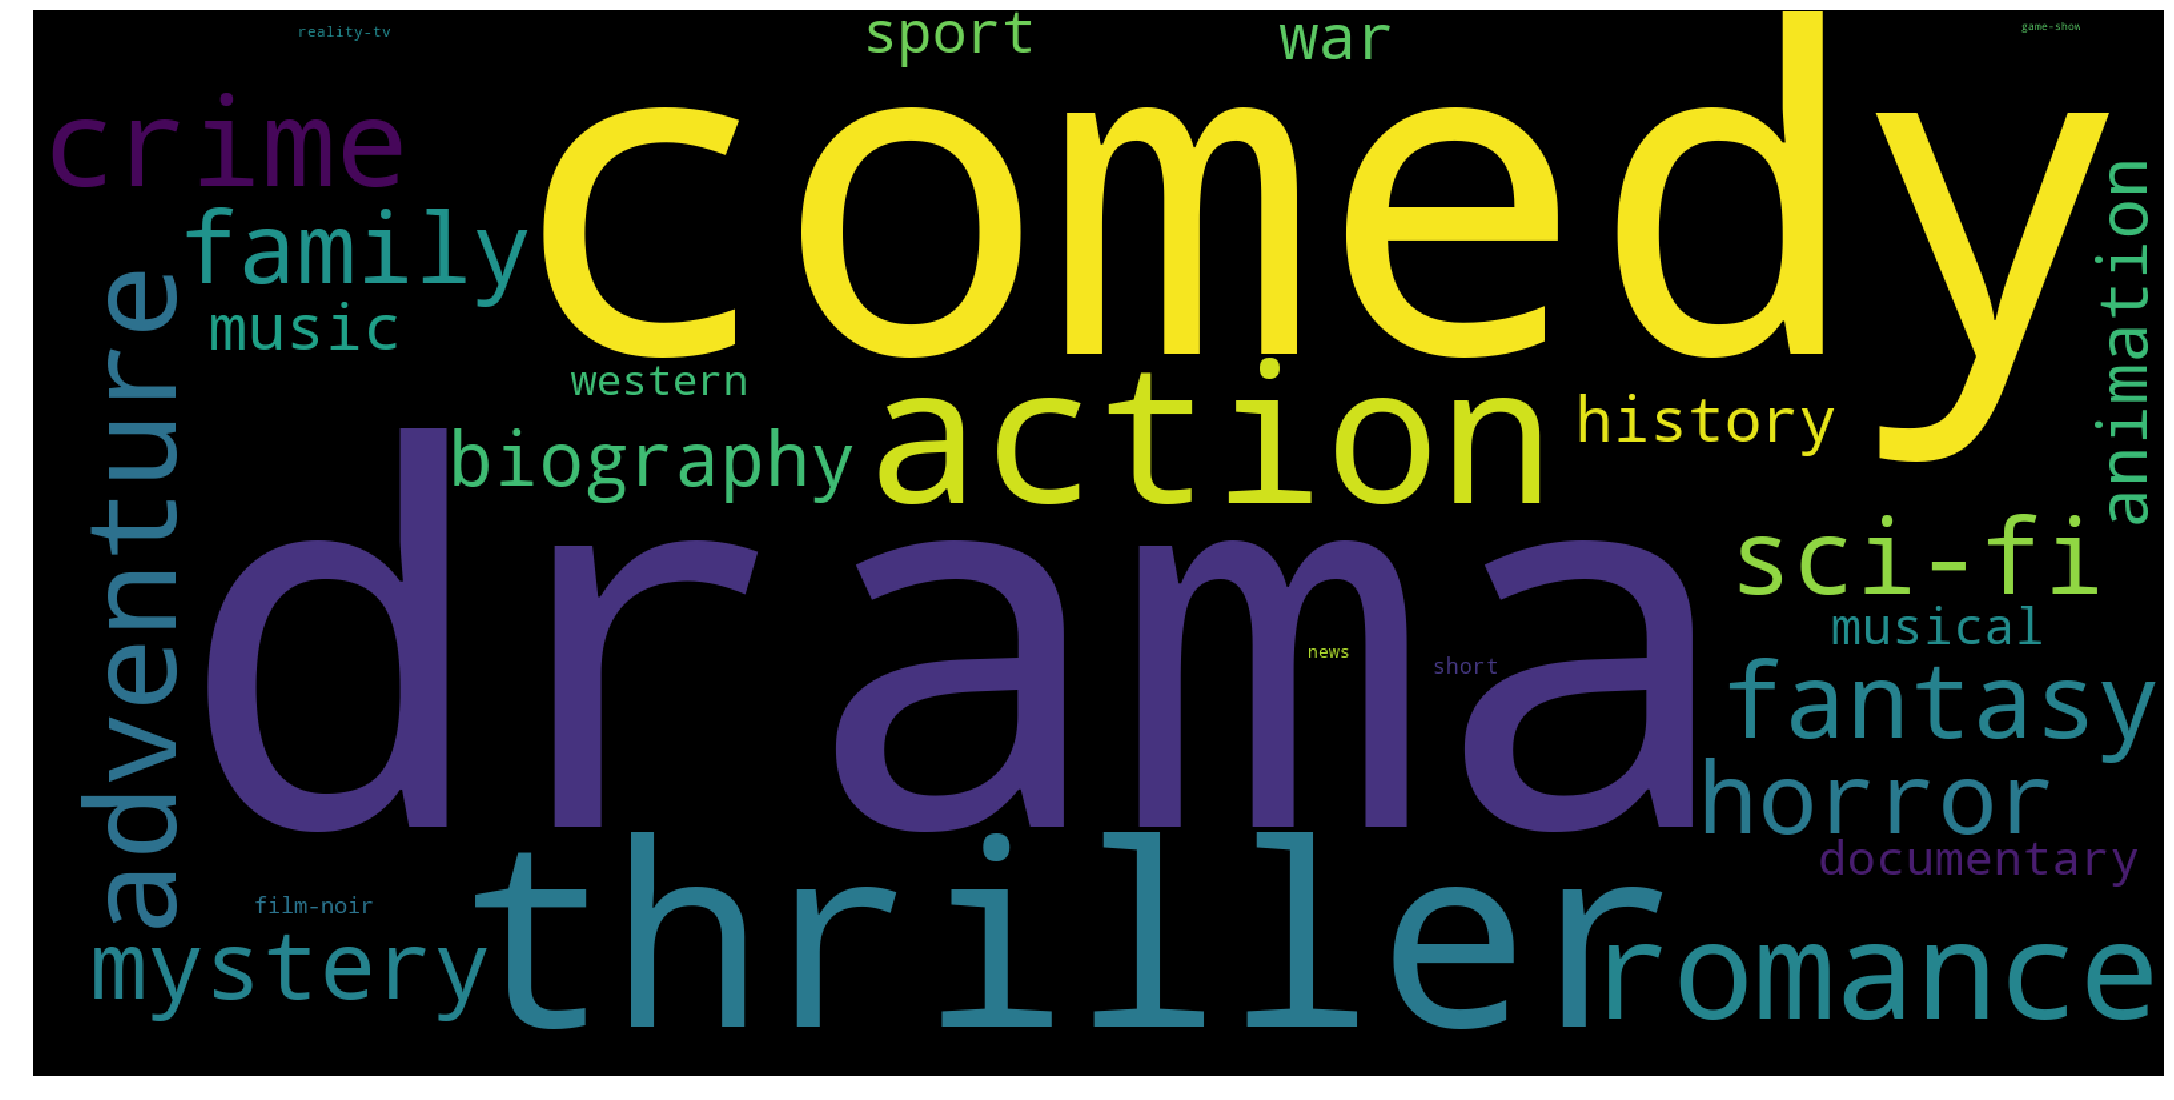

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
tup = dict(result.items())
wordcloud = WordCloud(    background_color='black',
                          width=1600,
                          height=800,
                    ).generate_from_frequencies(tup)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("genre.png")
plt.show()

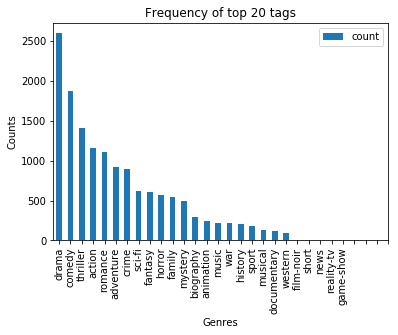

In [24]:
import numpy as np
i=np.arange(30)
df_genre_sort.head(30).plot(kind='bar')
plt.title('Frequency of top 20 tags')
plt.xticks(i, df_genre_sort['genres'])
plt.xlabel('Genres')
plt.ylabel('Counts')
plt.show()

In [25]:
# binary='true' will give a binary vectorizer
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
multilabel_y = vectorizer.fit_transform(df['cgenres'])

In [26]:
def genres_to_choose(n):
    t = multilabel_y.sum(axis=0).tolist()[0]
    sorted_genres_i = sorted(range(len(t)), key=lambda i: t[i], reverse=True)
    multilabel_yn=multilabel_y[:,sorted_genres_i[:n]]
    return multilabel_yn

def questions_explained_fn(n):
    multilabel_yn = genres_to_choose(n)
    x= multilabel_yn.sum(axis=1)
    return (np.count_nonzero(x==0))

In [27]:
questions_explained = []
total_genres=multilabel_y.shape[1]
total_qs=df.shape[0]
for i in range(1, total_genres):
    questions_explained.append(np.round(((total_qs-questions_explained_fn(i))/total_qs)*100,3))

<function matplotlib.pyplot.show(*args, **kw)>

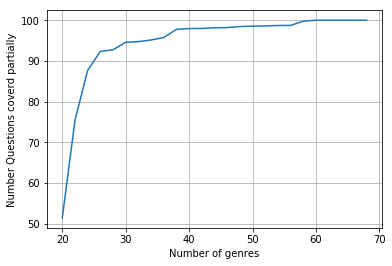

In [28]:
fig, ax = plt.subplots()
ax.plot(questions_explained)
xlabel = list(np.array(range(10,100,10)))
ax.set_xticklabels(xlabel)
plt.xlabel("Number of genres")
plt.ylabel("Number Questions coverd partially")
plt.grid()
plt.show

In [29]:
from sklearn.feature_extraction.text import TransformerMixin

In [30]:
d=pd.DataFrame()
d['storyline']=df.clean
d['genres']=df.cgenres
d.to_csv('C:/Users/admin-karim/Downloads/bn/final.csv',index=False)

In [31]:
df=pd.read_csv('C:/Users/admin-karim/Downloads/bn/final.csv')
df.head()

,storyline,genres
0,b'brother kill robberi parapleg marin jake sul...,Action Adventure Fantasy Sci-Fi
1,b'elizabeth captain barbossa rescu captain jac...,Action Adventure Fantasy
2,b'cryptic messag past send jame bond rogu miss...,Action Adventure Thriller
3,b'despit tarnish reput event dark knight took ...,Action Thriller
4,b'nan',Documentary


In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.storyline, df.genres, test_size=0.2, random_state=9)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
tfvectorizer = TfidfVectorizer(min_df=0.00009, max_features=200000, smooth_idf=True, norm="l2", \
                             tokenizer = lambda x: x.split(), sublinear_tf=False, ngram_range=(1,3))
x_train_multilabel = tfvectorizer.fit_transform(x_train)
x_test_multilabel = tfvectorizer.transform(x_test)

vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
y_train_multilabel = vectorizer.fit_transform(y_train)
y_test_multilabel = vectorizer.transform(y_test)

In [34]:
x_test_multilabel

<1009x200000 sparse matrix of type '<class 'numpy.float64'>'
	with 50712 stored elements in Compressed Sparse Row format>

In [55]:
y_train_multilabel.shape

(4034, 25)

In [35]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(x_train_multilabel, y_train_multilabel)
predictions = classifier.predict(x_test_multilabel)

print("accuracy :",metrics.accuracy_score(y_test_multilabel,predictions))
print("macro f1 score :",metrics.f1_score(y_test_multilabel, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test_multilabel, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test_multilabel,predictions))
print("Precision recall report :\n",metrics.classification_report(y_test_multilabel, predictions))

accuracy : 0.10604558969276512
macro f1 score : 0.4103509948387882
micro f1 scoore : 0.5928544845552661
hamming loss : 0.08673934588701684
Precision recall report :
               precision    recall  f1-score   support

           0       0.62      0.68      0.65       229
           1       0.67      0.57      0.62       191
           2       0.56      0.16      0.25        57
           3       0.64      0.17      0.26        54
           4       0.68      0.63      0.65       361
           5       0.58      0.62      0.60       160
           6       0.78      0.24      0.37        29
           7       0.70      0.71      0.71       514
           8       0.48      0.49      0.48       113
           9       0.58      0.42      0.49       118
          10       0.00      0.00      0.00         0
          11       0.50      0.13      0.21        45
          12       0.68      0.50      0.58       116
          13       0.50      0.34      0.41        29
          14       0.40

c:\users\admin-karim\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\admin-karim\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
c:\users\admin-karim\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\admin-karim\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being s

In [78]:
print(y_train_multilabel.shape)

(4034, 25)


In [80]:
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix
from keras.callbacks import LambdaCallback
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils
from keras.optimizers import RMSprop
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import random
import sys
import io
import re
import string
from keras.layers import Dense

# This code was tested with TensorFlow v1.4
print("You have TensorFlow version", tf.__version__)

import numpy as np

from keras import Sequential
from keras import layers

from keras.preprocessing import sequence
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

You have TensorFlow version 1.8.0


In [47]:
max_features = 100
# cut texts after this number of words
# (among top max_features most common words)
max_len = 100
batch_size =32
#x_train[0:1]
#x_train

In [67]:
max_len = 500       #length of sequence
batch_size = 256
epochs = 500

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
#max_features = len(word_index) + 1   # (number of words in the vocabulary) + 1
#x_train = sequence.pad_sequences(x_train, maxlen=max_len, padding='pre')

In [92]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters = '!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['storyline'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 25814 unique tokens.


In [95]:
features = tokenizer.texts_to_sequences(df['storyline'].values)
features = pad_sequences(features, maxlen = MAX_SEQUENCE_LENGTH)
print('Shape of input tensor:', features.shape)

Shape of input tensor: (5043, 250)


In [96]:
labels = pd.get_dummies(df['genres']).values
print('Shape of label tensor:', labels.shape)

Shape of label tensor: (5043, 914)


In [97]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.4, random_state = 42)

In [98]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128))
model.add(Dropout(0.3))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 250, 100)          0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 128)               117248    
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 914)               117906    
Total params: 5,235,154
Trainable params: 5,235,154
Non-trainable params: 0
_________________________________________________________________


In [99]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [100]:
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=1,
          validation_data=[x_test, y_test])

Train...
Train on 3025 samples, validate on 2018 samples
Epoch 1/1
3025/3025 [==============================] - 49s 16ms/step - loss: 6.8059 - acc: 0.0314 - val_loss: 6.7535 - val_acc: 0.0436


In [101]:
loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.0489
Testing Accuracy:  0.0436
